# ENVIRONMENT

In [45]:
import tensorflow as tf

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

! pip install nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

Version:  2.10.0
Eager mode:  True
GPU is NOT AVAILABLE
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to /home/chris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to /home/chris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to /home/chris/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package omw-1.4 to /home/chris/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras

# from tensorflow.keras import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

import re
import string 


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


from nltk.tokenize import RegexpTokenizer
LEMMA = nltk.WordNetLemmatizer()
STOP_WORDS = stopwords.words('english')



from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# suppress scientific notation in Pandas
pd.options.display.float_format = "{:.2f}".format
pd.set_option("display.max_colwidth", 5000)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
# pd.set_option("precision", 3)
pd.set_option("display.max_colwidth", None)

plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.dpi"] = 150

sns.set()
sns.set_context("notebook", rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")

import warnings

warnings.filterwarnings("ignore")

RANDOM_STATE = 1

In [7]:
original_df = pd.read_json("./src/amazon/reviews_Digital_Music_5.json", lines=True)
# df = original_df.copy()

In [8]:
def clean_text(s:str) -> str:
    # remove whitespace
    s = s.strip()
    
    # lowercase
    s = s.lower()

    # create tokenize to tokenize on word characters
    tokenizer = RegexpTokenizer('\w+')    
    # tokenize on word characters
    tokens = tokenizer.tokenize(text=s)
    
    # lemmatize work
    tokens = [LEMMA.lemmatize(word=word) for word in tokens]

    # remove stop words     
    tokens = [word for word in tokens if word not in STOP_WORDS]

    # rejoin tokens into a string
    return " ".join(tokens)


def get_index(data, reverse=True, n=25):
    t = tf.keras.preprocessing.text.Tokenizer(oov_token = '[UNK]', lower=True)
    t.fit_on_texts(data)
    index = t.word_index
    
    sorted_index = dict(sorted(index.items(), key= lambda kv:(kv[1], kv[0]), reverse=reverse)[0:n])
    return len(index), sorted_index

# get_index(["This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf..."])

In [9]:
# DATA PREPATION STEPS
# 1. Import data set as a data frame.
prep_df = original_df.copy()

# 2. Load packages for TensorFlow, Keras, and other libraries.

# 3. EDA – to better understand the data structure.
original_df.head(1)
original_df.info()
original_df.shape

# 4. Remove unusual characters: uppercase letters, punctuation marks, emoticons, and non-English characters.
prep_df["words"] = prep_df.reviewText.apply(lambda x: clean_text(s=x))
prep_df["wordCount"] = prep_df.reviewText.apply(lambda x: len(x.split(" ")))


prep_df.head(1)


# pd.DataFrame(words)
# words = re.split(r'\W+', words.reviewText)
# prep_df["words"] = prep_df.words.str.split()
# prep_df["words"] = prep_df.words.str.split(r'\W+')
# prep_df["words"]

# prep_df.head(1)

# 5. Measure the vocabulary size using (bags of words, etc.).


# 6. Explore N-Gram (unigram, bigram, and trigram) structures for usefulness in text analysis as applicable.

# 7. Determine the word embedding and explore embedded words based on target inputs.

# 8. Set the maximum sequence length based on the length of the longest sentence in the data set.

# 9. Tokenize sentences into a list of tokens and remove stop words.

# 10. Pad cleaned sentences to fit the maximum sequence length after each text sequence.

# 11. Create an activation function filled with dense layers of the neural network.

# 12. Split the data set into training and test sets or into training/test/validation sets.


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""","[3, 3]","It's hard to believe ""Memory of Trees"" came out 11 years ago;it has held up well over the passage of time.It's Enya's last great album before the New Age/pop of ""Amarantine"" and ""Day without rain."" Back in 1995,Enya still had her creative spark,her own voice.I agree with the reviewer who said that this is her saddest album;it is melancholy,bittersweet,from the opening title song.""Memory of Trees"" is elegaic&majestic.;""Pax Deorum"" sounds like it is from a Requiem Mass,it is a dark threnody.Unlike the reviewer who said that this has a ""disconcerting"" blend of spirituality&sensuality;,I don't find it disconcerting at all.""Anywhere is"" is a hopeful song,looking to possibilities.""Hope has a place"" is about love,but it is up to the listener to decide if it is romantic,platonic,etc.I've always had a soft spot for this song.""On my way home"" is a triumphant ending about return.This is truly a masterpiece of New Age music,a must for any Enya fan!",5,Enya's last great album,1158019200,"09 12, 2006"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64706 entries, 0 to 64705
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      64706 non-null  object
 1   asin            64706 non-null  object
 2   reviewerName    64529 non-null  object
 3   helpful         64706 non-null  object
 4   reviewText      64706 non-null  object
 5   overall         64706 non-null  int64 
 6   summary         64706 non-null  object
 7   unixReviewTime  64706 non-null  int64 
 8   reviewTime      64706 non-null  object
dtypes: int64(2), object(7)
memory usage: 4.4+ MB


(64706, 9)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,words,wordCount
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""","[3, 3]","It's hard to believe ""Memory of Trees"" came out 11 years ago;it has held up well over the passage of time.It's Enya's last great album before the New Age/pop of ""Amarantine"" and ""Day without rain."" Back in 1995,Enya still had her creative spark,her own voice.I agree with the reviewer who said that this is her saddest album;it is melancholy,bittersweet,from the opening title song.""Memory of Trees"" is elegaic&majestic.;""Pax Deorum"" sounds like it is from a Requiem Mass,it is a dark threnody.Unlike the reviewer who said that this has a ""disconcerting"" blend of spirituality&sensuality;,I don't find it disconcerting at all.""Anywhere is"" is a hopeful song,looking to possibilities.""Hope has a place"" is about love,but it is up to the listener to decide if it is romantic,platonic,etc.I've always had a soft spot for this song.""On my way home"" is a triumphant ending about return.This is truly a masterpiece of New Age music,a must for any Enya fan!",5,Enya's last great album,1158019200,"09 12, 2006",hard believe memory tree came 11 year ago ha held well passage time enya last great album new age pop amarantine day without rain back 1995 enya still creative spark voice agree reviewer said saddest album melancholy bittersweet opening title song memory tree elegaic majestic pax deorum sound like requiem mass dark threnody unlike reviewer said ha disconcerting blend spirituality sensuality find disconcerting anywhere hopeful song looking possibility hope ha place love listener decide romantic platonic etc always soft spot song way home triumphant ending return truly masterpiece new age music must enya fan,153


In [28]:
# 1.	Analyzing the data and review length.

original_df.head(2)
original_df.info()
original_df.shape

# 2.	Creating a dictionary and applying it to remove extraneous characters.
# 3.	Deciding on a typical review length.
# 4.	Tokenization.
# 5.	Applying Tensorflow’s keras and layers methods
# 6.	Splitting the dataset into train and test
# 7.	Fitting the model
# 8.	Model evaluation and reporting.


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""","[3, 3]","It's hard to believe ""Memory of Trees"" came out 11 years ago;it has held up well over the passage of time.It's Enya's last great album before the New Age/pop of ""Amarantine"" and ""Day without rain."" Back in 1995,Enya still had her creative spark,her own voice.I agree with the reviewer who said that this is her saddest album;it is melancholy,bittersweet,from the opening title song.""Memory of Trees"" is elegaic&majestic.;""Pax Deorum"" sounds like it is from a Requiem Mass,it is a dark threnody.Unlike the reviewer who said that this has a ""disconcerting"" blend of spirituality&sensuality;,I don't find it disconcerting at all.""Anywhere is"" is a hopeful song,looking to possibilities.""Hope has a place"" is about love,but it is up to the listener to decide if it is romantic,platonic,etc.I've always had a soft spot for this song.""On my way home"" is a triumphant ending about return.This is truly a masterpiece of New Age music,a must for any Enya fan!",5,Enya's last great album,1158019200,"09 12, 2006"
1,AZPWAXJG9OJXV,5555991584,bethtexas,"[0, 0]","A clasically-styled and introverted album, Memory of Trees is a masterpiece of subtlety. Many of the songs have an endearing shyness to them - soft piano and a lovely, quiet voice. But within every introvert is an inferno, and Enya lets that fire explode on a couple of songs that absolutely burst with an expected raw power.If you've never heard Enya before, you might want to start with one of her more popularized works, like Watermark, just to play it safe. But if you're already a fan, then your collection is not complete without this beautiful work of musical art.",5,Enya at her most elegant,991526400,"06 3, 2001"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64706 entries, 0 to 64705
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      64706 non-null  object
 1   asin            64706 non-null  object
 2   reviewerName    64529 non-null  object
 3   helpful         64706 non-null  object
 4   reviewText      64706 non-null  object
 5   overall         64706 non-null  int64 
 6   summary         64706 non-null  object
 7   unixReviewTime  64706 non-null  int64 
 8   reviewTime      64706 non-null  object
dtypes: int64(2), object(7)
memory usage: 4.4+ MB


(64706, 9)

In [ ]:
# For Task Two: Actually, it is pretty simple.  There are three text files, Amazon, IMDB, and Yelp.  You want to do a neural net to find the Sentiment index among the reviews.  These are the high-level ten basic steps:

# 1.	If you run a couple of FOR loops to translate characters (essentially “cleaning up”).   There will be 52 unique characters remaining.
# 2.	Plot a histogram to find the length of the reviews. Most of the 500 reviews will be under 150 characters in length.
# 3.	Create a dictionary for characters and tokens.
# 4.	Use arrays to hold each review and assign to it a list of one-hot-encoded characters.
# 5.	Code the output array to represent the review as positive (1) or negative (0).  The target value is binary.
# 6.	Add terminators to the end of the data to fill the fixed length strings.
# 7.	Using sklearn, numpy, and keras train a neural net.  Split data prior to training into test and validation.
# 8.	By reading through the data in the network, weights are adjusted until errors are minimized.  Each period or cycle is referred to as an epoch.
# 9.	Then, you run a sequential neural net using keras.Sequential()
# 10.	After using the training process iteratively, the model.evaluate(x, y) will confirm the reliability. 


# Introduction

You have seen the power of using data analytical techniques to help organizations make data-driven decisions and now want to extend these models into areas of machine learning and artificial intelligence. In this task, you will explore the use of neural networks and natural language processing (NLP).

In this task, you will choose a data file from the Web Links section. The available data sets are as follows:
- [Amazon Product Data set](http://jmcauley.ucsd.edu/data/amazon/)
- [UCSD Recommender Systems Data sets](https://cseweb.ucsd.edu/~jmcauley/datasets.html)
- UCI Sentiment Labeled Sentences Data set

For this task, you will build a neural network designed to learn word usage and context using NLP techniques. You will provide visualizations and a report, as well as build your network in an interactive development environment.

In the telecom munications industry, customers can choose from multiple service providers and actively switch from one provider to another. Customer churn is defined as the percentage of customers who stopped using a provider’s product or service during a certain time frame. In this highly competitive market, some telecommunications industries can experience average annual churn rates as high as 25 Given that it costs 10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many providers retaining highly profitable customers is the number one business goal. To reduce customer churn, telecom munications companies need to predict which customers are at high risk of churn.

As part of the “churn” project, executives would like to see consider a time series on revenue from the first years of operation. Once they understand any patterns in that data, they feel confident in understanding the impact of churn in current times. The given time series data records the daily revenue, in million dollars, during the first two years of operation.

**Data File being used:**
teleco_time_series.csv

**Data Dictionary:**
- The data set consists of 731 rows and two columns:
    - Day Day during first two years of operation
    - Revenue Revenue in million dollars
    
Review the data dictionary and considerations related to the raw data file you have chosen and prepare the data for time series modeling. You will then analyze that data set using time series modeling, create visualizations, generate forecasts, and deliver the results of your analysis.

# Part 0: Data Exploration

In [ ]:
df.head()


In [ ]:
df.shape


In [ ]:
df.info()


In [ ]:
pd.DataFrame(df.isnull().sum(), columns=["# NaNs"])


In [ ]:
f"{df.isnull().sum().sum():,} Total NaN Cells"


# Part I:  Research Question

## A.  Describe the purpose of this data analysis by doing the following:



### 1.  Summarize one research question that you will answer using neural network models and NLP techniques. Be sure the research question is relevant to a real-world organizational situation and sentiment analysis captured in your chosen dataset.



### 2.  Define the objectives or goals of the data analysis. Be sure the objectives or goals are reasonable within the scope of the research question and are represented in the available data.



### 3.  Identify a type of neural network capable of performing a text classification task that can be trained to produce useful predictions on text sequences on the selected data set.


# Part II:  Data Preparation


## B.  Summarize the data cleaning process by doing the following:



### 1.  Perform exploratory data analysis on the chosen dataset, and include an explanation of each of the following elements:


#### a. presence of unusual characters (e.g., emojis, non-English characters, etc.)
> Unusual or non-word characters do exist within review texts


In [125]:
def get_non_words(data):
    non_word_tokenizer = RegexpTokenizer('[^\w\s]')    

    # tokenize on non-word and non-space characters
    return non_word_tokenizer.tokenize(text=data)

tokens_df = original_df.reviewText.apply(lambda x: set(get_non_words(data=x)))
tokens_df

0                 {", ,, /, ;, !, ', ., &}
1                             {', -, ., ,}
2                                {', ., ,}
3                    {), -, ,, (, !, ', .}
4        {), :, ", ,, -, (, /, ;, ?, ', .}
                       ...                
64701                                  {.}
64702                         {', -, ., !}
64703                               {,, .}
64704          {), ,, (, ;, !, #, ', ., &}
64705          {), ,, (, ;, !, #, ', ., &}
Name: reviewText, Length: 64706, dtype: object

In [129]:
token_set = set()

for tokens in tokens_df:
    for token in tokens:
        token_set.add(token)

print("Non-Word Tokens Exist")
print(sorted(list(token_set)))

Non-Word Tokens
['\x03', '\x16', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '=', '>', '?', '@', '[', '\\', ']', '^', '`', '{', '|', '}', '~']


#### b. vocabulary size
> the vocabulary size is

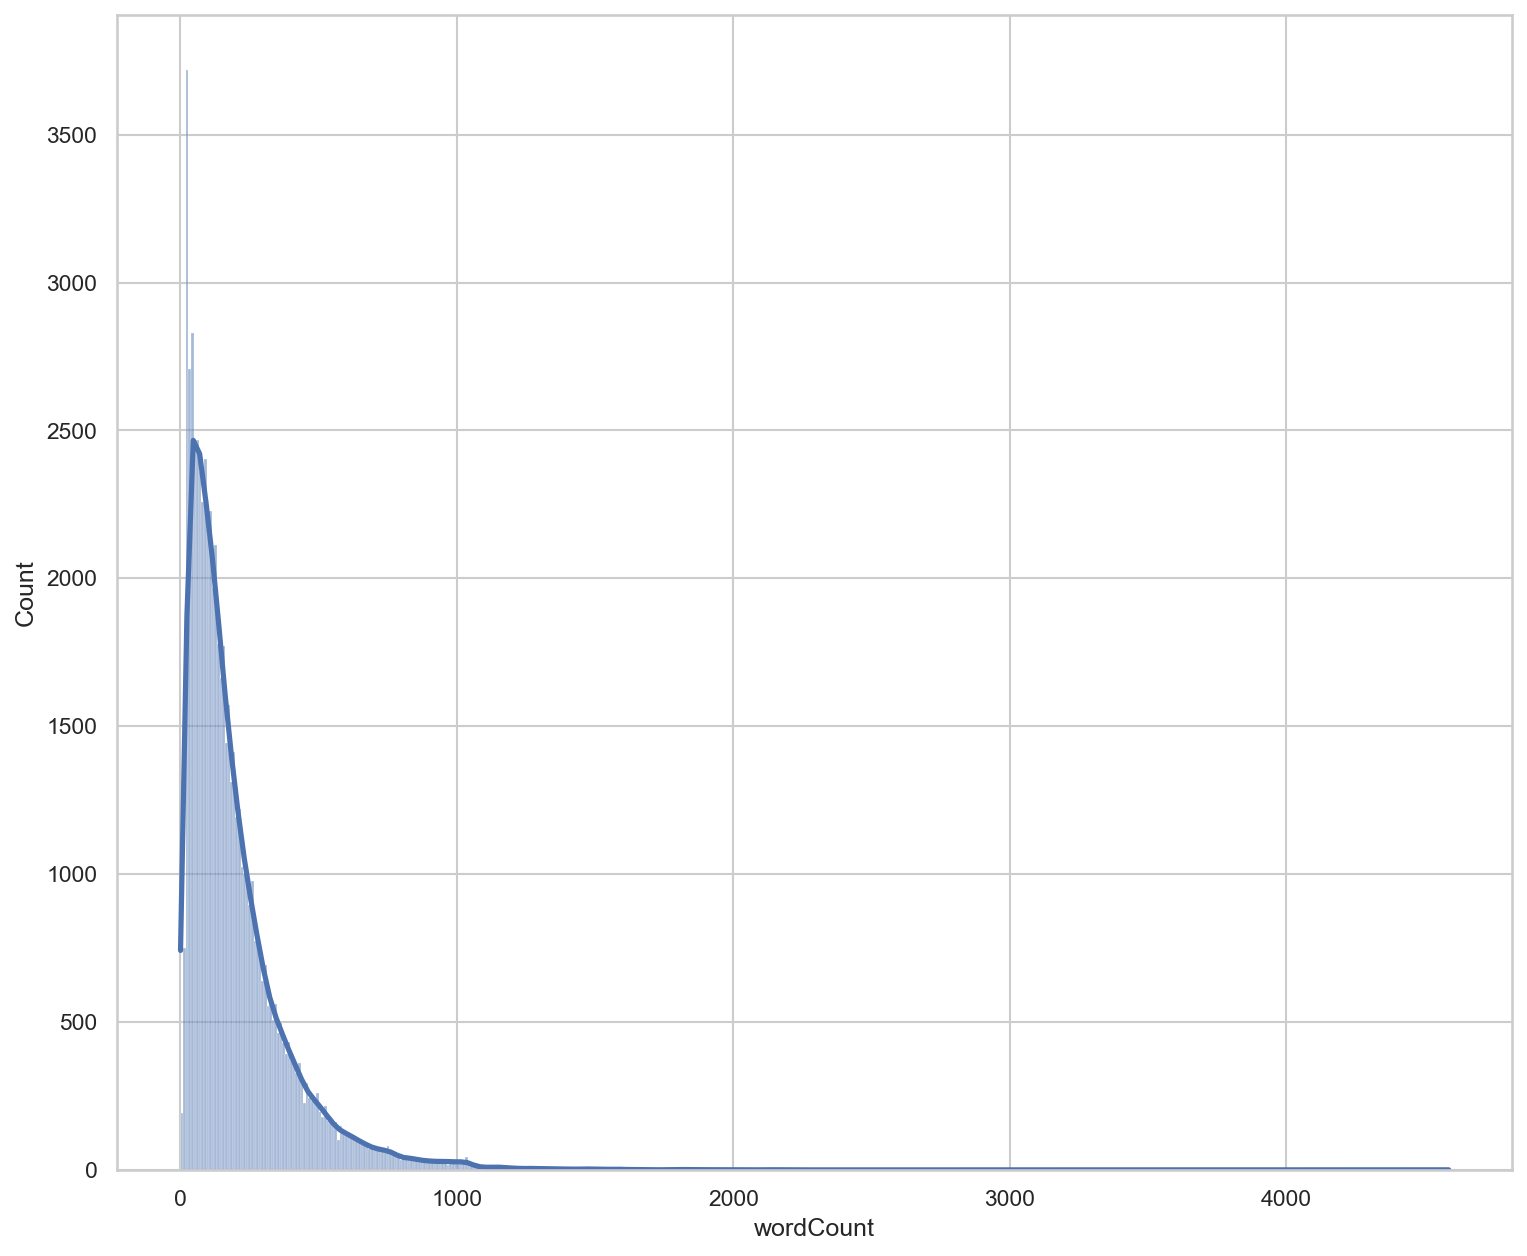

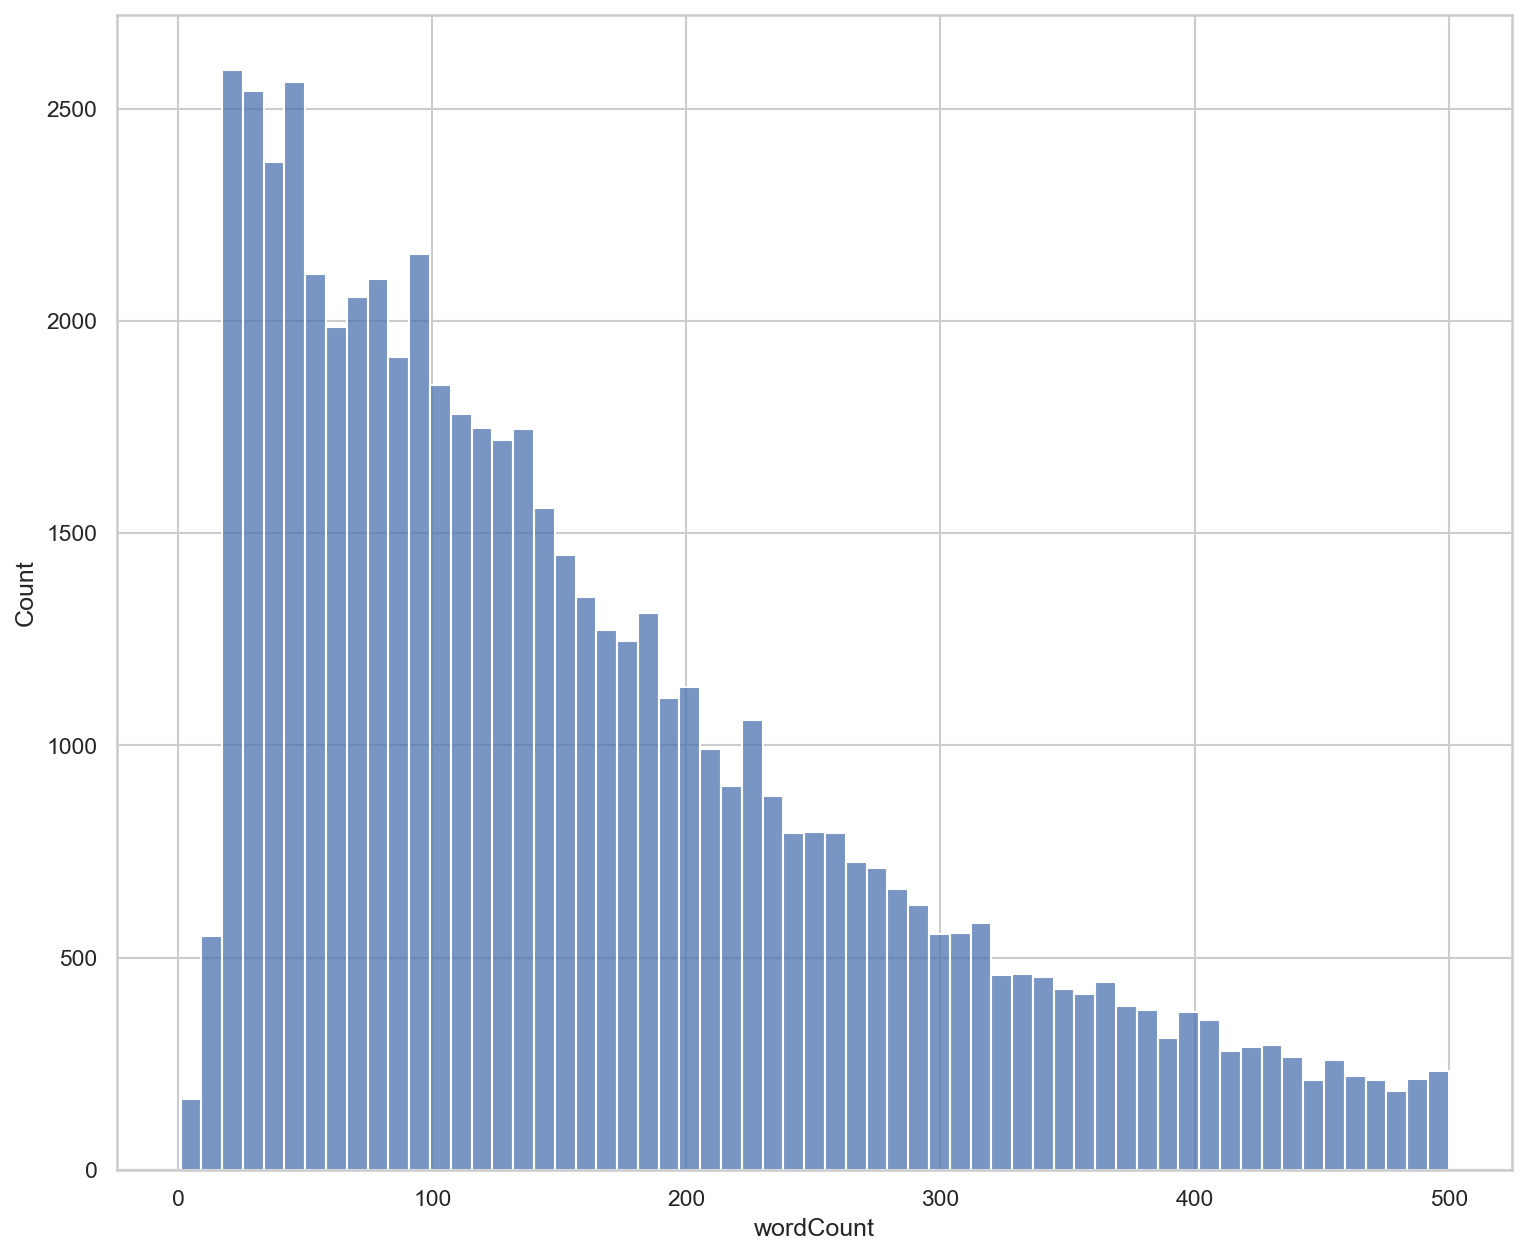

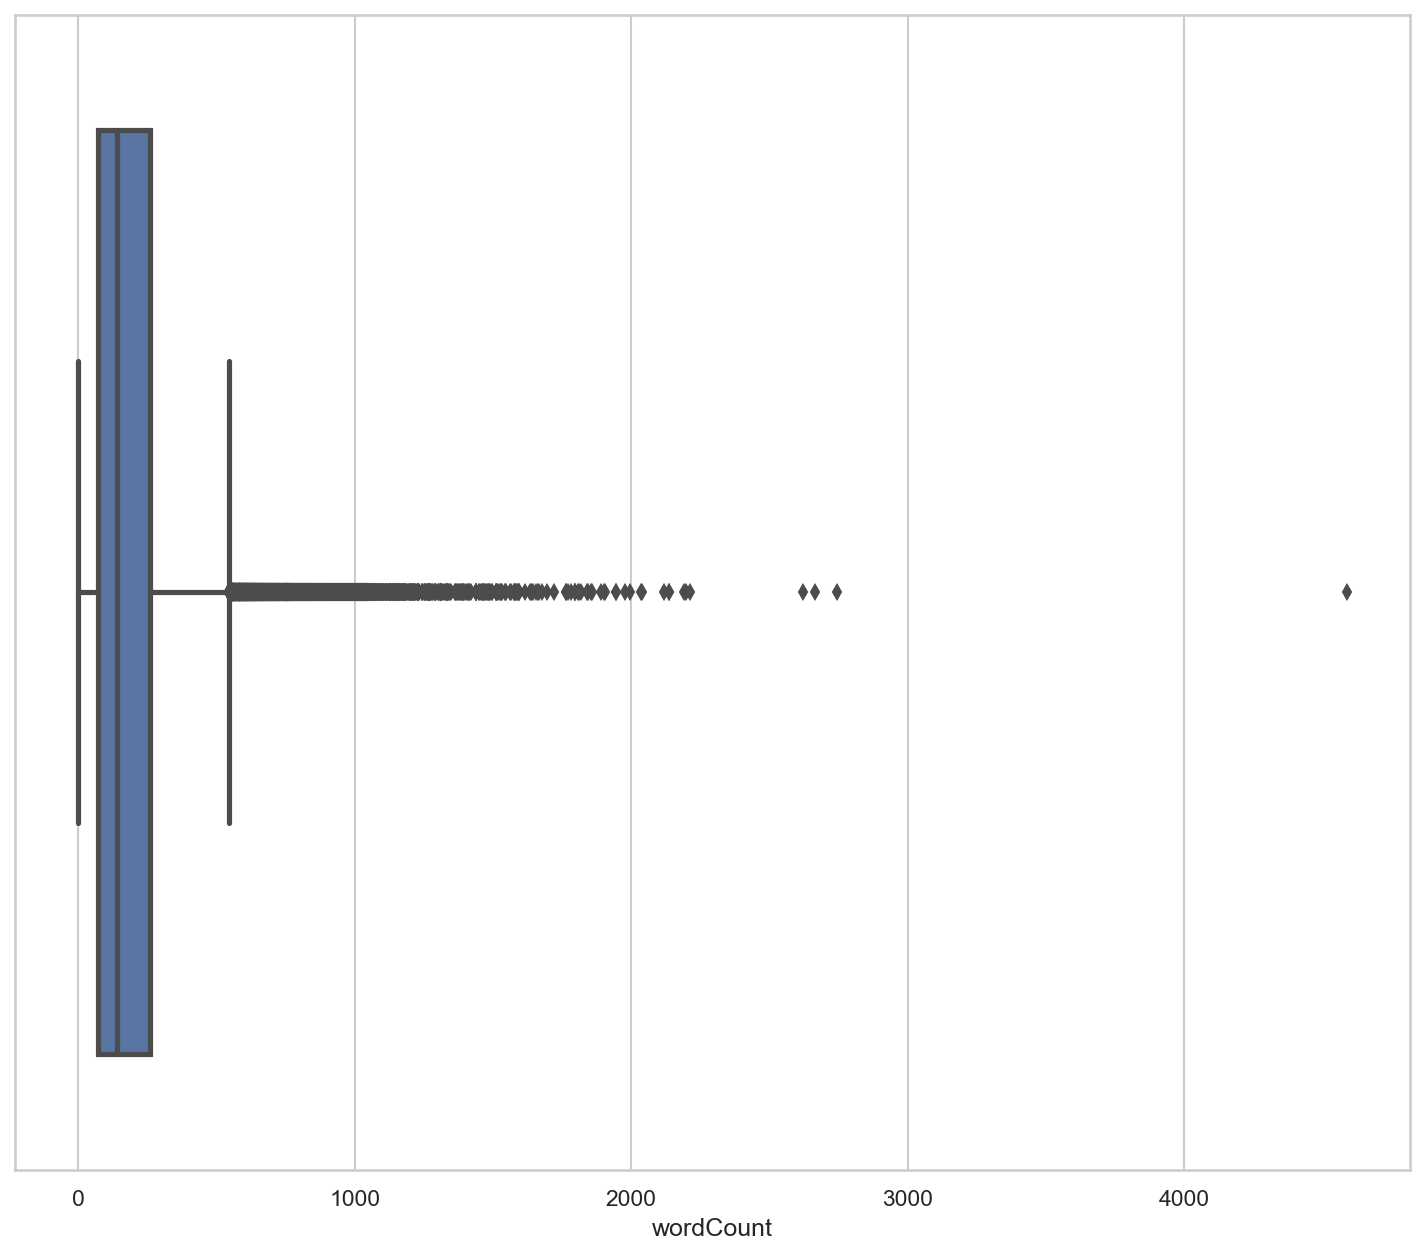

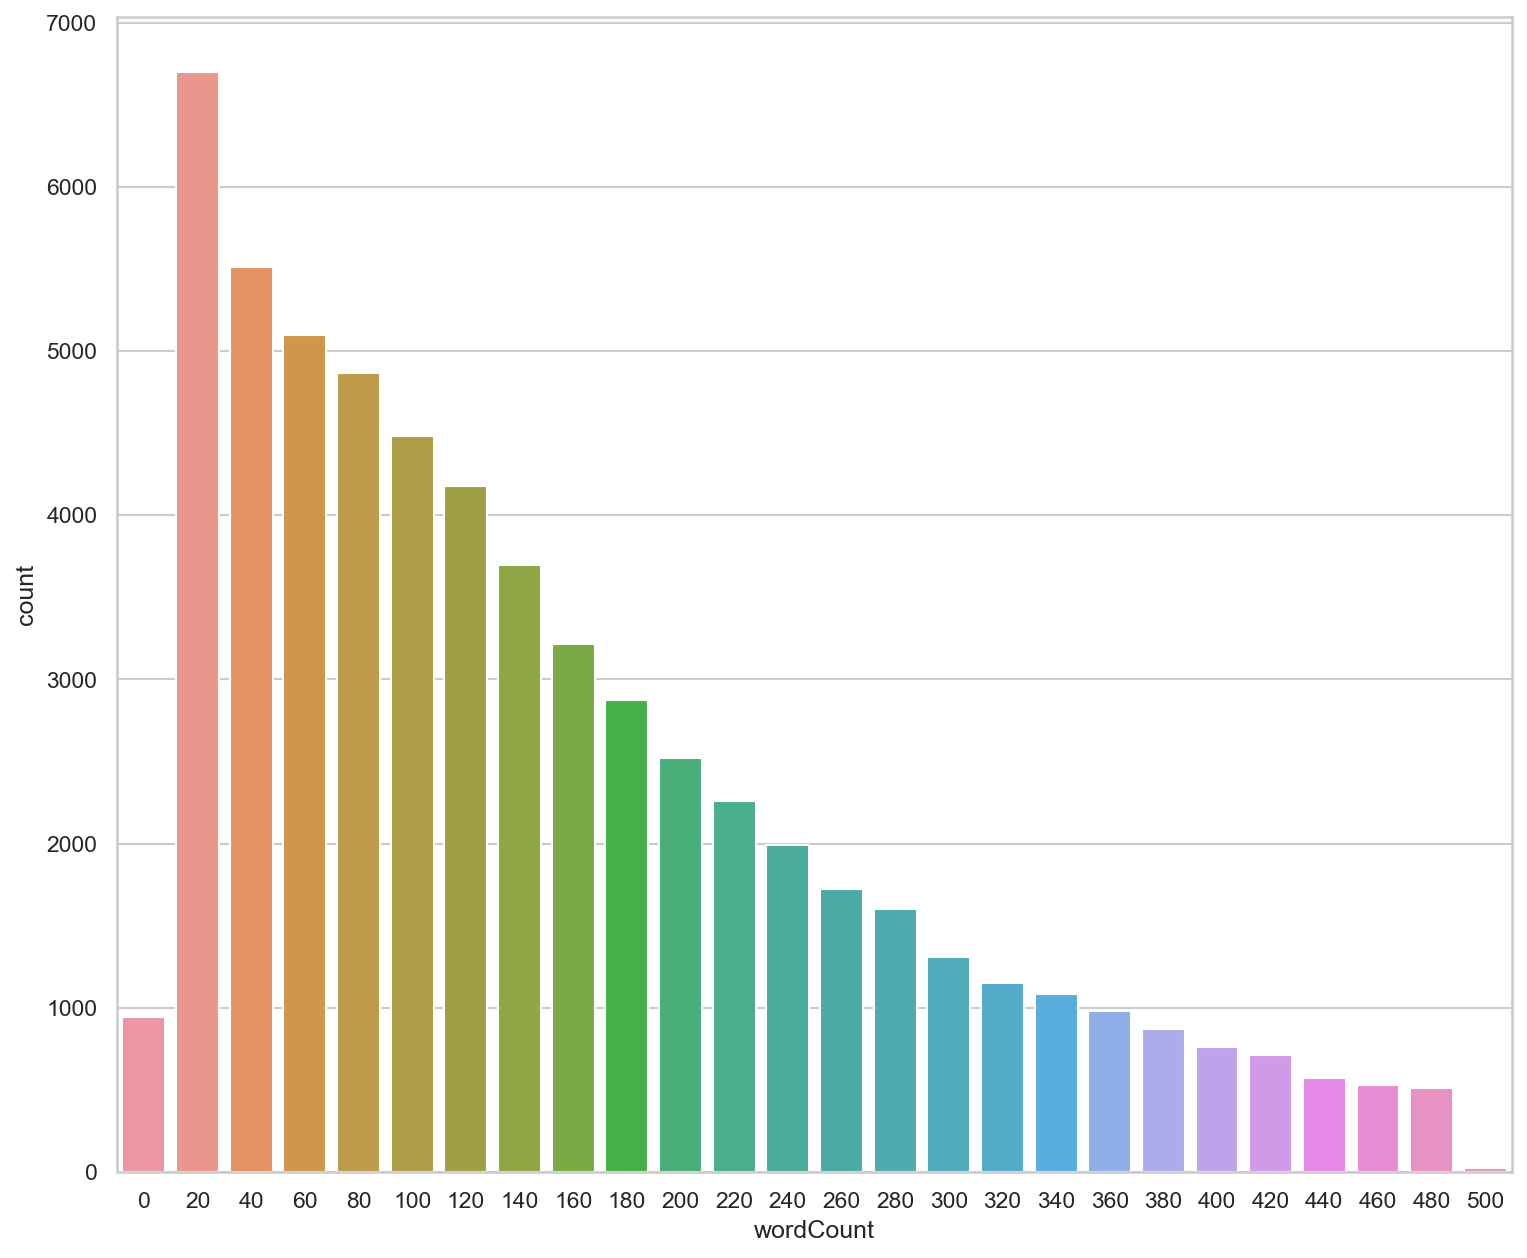

In [110]:
ax = sns.histplot(prep_df.wordCount, kde=True)
plt.show()

ax = sns.histplot(prep_df[prep_df.wordCount <= 500].wordCount)
plt.show()

ax = sns.boxplot(x=prep_df.wordCount)
plt.show()

ax = sns.countplot(x=round(prep_df[prep_df.wordCount <= 500].wordCount//20)*20)
plt.show()




In [37]:
vocab_size, counts = get_index(data=prep_df.words)

vocab_size += 1
print(f"Vocab Size: {vocab_size:,}")
counts

Vocab Size: 108,495


{'atweh': 108494,
 'nasri': 108493,
 'instigate': 108492,
 'segu': 108491,
 'grazer': 108490,
 '10m': 108489,
 'chiropractor': 108488,
 'sunsdoesn': 108487,
 'presencerakim': 108486,
 'songtom': 108485,
 'sandcons': 108484,
 'thingsbest': 108483,
 'solosenergybetter': 108482,
 'lengthepic': 108481,
 'conceptalbum': 108480,
 'masterpiececonclusion': 108479,
 'beautiful12': 108478,
 'moody11': 108477,
 'ps3': 108476,
 'experimental10': 108475,
 'untraveled': 108474,
 'offbalanced': 108473,
 'catchy9': 108472,
 'throwback8': 108471,
 'exhilarating7': 108470}

#### c. proposed word embedding length

In [41]:
max_sequence_embedding = round(vocab_size ** (1/4))
max_sequence_embedding

18

In [43]:
# tf.keras.layers.Embedding(NUM_WORDS, EMBEDDING_SIZE)
tf.keras.layers.Embedding(vocab_size, max_sequence_embedding)


#### d. statistical justification for the chosen maximum sequence length

In [205]:
r_len = []

for r in prep_df.words:
    r_len.append(len(r.split(" ")))

max_len = round(np.mean(r_len))

pd.DataFrame(dict(
    mix= np.min(r_len),
    med=np.median(r_len),
    avg=np.mean(r_len),    
    max= np.max(r_len)
                 ), index=["Review Length"]).T

print(f"Based on the average review length, the max review length should be: {max_len}")

,Review Length
mix,1.00
med,78.00
avg,111.43
max,2571.00


Based on the average review length, the max review length should be: 111


### 2.  Describe the goals of the tokenization process, including any code generated and packages that are used to normalize text during the tokenization process.

The tokenization process is to separate the text into smaller chunks or tokens. The chunks can be words, characters, or sub-word. A unique index called "word_index" is assigned to each word in the text which helps the model during the training process (TensorFlow, n.d; MLK, 2021).

Other goals that the tokenization process can achieve  include: 
- Replacing any abnormal character, formatting, and standardizing texts,
- Lemmatizing words and transforming the text into sequences, and
- Preparing the transformed sequences to a maximum sequence length by padding. 


In [69]:
t = Tokenizer(num_words=vocab_size, oov_token="<UNK>" )
t.fit_on_texts(prep_df.words)

list(t.word_index.items())[:10]

[('<UNK>', 1),
 ('album', 2),
 ('song', 3),
 ('quot', 4),
 ('wa', 5),
 ('one', 6),
 ('like', 7),
 ('track', 8),
 ('ha', 9),
 ('music', 10)]

In [66]:
t.texts_to_sequences(prep_df.words.values[:5])


[[90,
  294,
  802,
  1446,
  163,
  570,
  31,
  452,
  9,
  1936,
  22,
  2825,
  15,
  4963,
  84,
  13,
  2,
  33,
  484,
  51,
  39489,
  65,
  150,
  701,
  37,
  1749,
  4963,
  24,
  593,
  1630,
  58,
  1016,
  671,
  201,
  7736,
  2,
  1460,
  3415,
  425,
  111,
  3,
  802,
  1446,
  33790,
  3868,
  18212,
  18213,
  14,
  7,
  11884,
  1723,
  311,
  51212,
  717,
  671,
  201,
  9,
  13405,
  849,
  5161,
  6545,
  116,
  13405,
  1653,
  4110,
  3,
  378,
  3972,
  374,
  9,
  219,
  16,
  305,
  2354,
  1024,
  23911,
  529,
  99,
  565,
  989,
  3,
  35,
  315,
  5636,
  1081,
  590,
  249,
  345,
  33,
  484,
  10,
  164,
  4963,
  32],
 [51213,
  3145,
  19606,
  2,
  802,
  1446,
  345,
  4729,
  45,
  3,
  4417,
  25482,
  565,
  195,
  788,
  998,
  58,
  860,
  71,
  30148,
  6497,
  4963,
  127,
  359,
  4909,
  333,
  3,
  513,
  2784,
  1101,
  633,
  318,
  61,
  62,
  4963,
  211,
  88,
  124,
  6,
  10703,
  54,
  7,
  13406,
  148,
  1714,
  275,
  32,
  

### 3.  Explain the padding process used to standardize the length of sequences, including the following in your explanation:











In [72]:


# t = tf.keras.preprocessing.text.Tokenizer(oov_token = '[UNK]', lower=True)
seq_train = t.texts_to_sequences(prep_df.words.values)
# seq_train
pad_train = pad_sequences(sequences=seq_train, maxlen=50, padding="post", truncating="post")
pad_train

array([[   90,   294,   802, ...,    14,     7, 11884],
       [51213,  3145, 19606, ...,   114,   563,   150],
       [   61,   182,  4963, ...,     0,     0,     0],
       ...,
       [  513,    16,     3, ...,     0,     0,     0],
       [ 1420,  1403,    38, ...,  3460,  1090,   407],
       [  858,  3504,    21, ...,  7572,   239,     7]], dtype=int32)

#### a. if the padding occurs before or after the text sequence

#### b. a screenshot of a single padded sequence

### 4.  Identify how many categories of sentiment will be used and an activation function for the final dense layer of the network.

### 5.  Explain the steps used to prepare the data for analysis, including the size of the training, validation, and test set split.

In [165]:
from sklearn.model_selection import train_test_split

prep_df["overall_pos_neg"] = prep_df.overall.map(lambda x: 1 if x > 3 else -1 )

# x should be padded seqs
X, y = prep_df["words"], prep_df["overall_pos_neg"]

# y

# # # prep_df.head()
# # # X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

cols = ["words", "overall_pos_neg"]
train_df= pd.DataFrame(zip(X_train, y_train), columns=cols)
train_df.head(1)
train_df.overall_pos_neg.value_counts()


test_df= pd.DataFrame(zip(X_test, y_test), columns=cols)
test_df.head(1)
test_df.overall_pos_neg.value_counts()


,words,overall_pos_neg
0,favorite ohio player lp mainly 7 terrific song great writing terrific playing lovliest quirkiest vocal ever put wax title track open album sport one prettiest melody gent ever come doo wop flavored ballad set calming soothing mood permeates almost every track exception heavy rock funk track quot fopp quot ever wonder gun n rose copped riff quot paradise city quot answer number 1 hit quot love rollercoaster quot centerpiece album masterpiece quot sweet sticky thing quot one longest track special note band display overt jazz sound sax playing color chorus astounding drumming jimmy quot diamond quot williams notice great footwork cymbal roll crash close song track alone make lp worth owning closing ballad quot alone quot another stunner featuring sugarfoot guitar rising falling synth background sugarfoot plaintive voice singing lyric loneliness desperation wanna alone anymore someone pick floor quot alone quot end classic album melancholy hopeful note u hopeless romantic surprisingly quot honey quot never sound dated fact influence heard music artist last 2 decade music soul rock case point red hot chili pepper cover quot rollercoaster quot 1996 winning album ha stood rest time,1


 1    41692
-1    10072
Name: overall_pos_neg, dtype: int64

,words,overall_pos_neg
0,start addicted jazz love record could provide valuable information justify buying record say something great fluidity note silence happens stop listening wa also thinking bridge round midnight kind blue mistake way,1


 1    10424
-1     2518
Name: overall_pos_neg, dtype: int64

### 6.  Provide a copy of the prepared dataset.

# Part III:  Network Architecture



## C.  Describe the type of network used by doing the following:



### 1.  Provide the output of the model summary of the function from TensorFlow.

### 2.  Discuss the number of layers, the type of layers, and total number of parameters.


### 3.  Justify the choice of hyperparameters, including the following elements:



#### activation functions



#### number of nodes per layer



#### loss function



#### optimizer



#### stopping criteria



#### evaluation metric

# Part IV:  Model Evaluation



## D.  Evaluate the model training process and its relevant outcomes by doing the following:



### 1.  Discuss the impact of using stopping criteria instead of defining the number of epochs, including a screenshot showing the final training epoch.

### 2.  Provide visualizations of the model’s training process, including a line graph of the loss and chosen evaluation metric.


### 3.  Assess the fitness of the model and any measures taken to address overfitting.



### 4.  Discuss the predictive accuracy of the trained network.


# Part V:  Summary and Recommendations



## E.  Provide the code used to save the trained network within the neural network.


## F.  Discuss the functionality of your neural network, including the impact of the network architecture.


## G.  Recommend a course of action based on your results.



# Part VI: Reporting



## H.  Create your neural network using an industry-relevant interactive development environment (e.g., a Jupyter Notebook). Include a PDF or HTML document of your executed notebook presentation.


## I.  List the web sources used to acquire data or segments of third-party code to support the application.


## J.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.


## K.  Demonstrate professional communication in the content and presentation of your submission.

